# **Importing the Libraries & Loading the Data**

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [64]:
df = pd.read_csv("Zomato_data.csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# **DATA CLEANING**

As we know the rating of the restaurants are out of 5 only. So let's convert the data type of rate columns (From 4.1/5 - to 4.1 Only)

In [65]:
def handle_rating(rate):
    if isinstance(rate, str):
        rate = rate.split("/")[0]
    return float(rate)

In [66]:
df["rate"] = df["rate"].apply(handle_rating)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


**From here we'll move with the data as per the questions we have.**

# 1. What type of restaurant do the majority of customers order from ?

In [68]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of Restaurant')

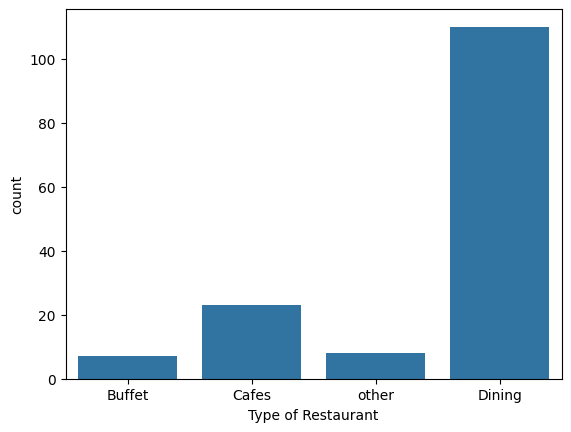

In [69]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")

**Conclusion**

SO this concludes that majority of customers order from 'Dining' type of restaurant, followed up by 'Cafes', then 'other' and closely followed by 'Buffet'.



# 2. How many votes has each type of restaurant received from customers ?

In [70]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [71]:
df.groupby("listed_in(type)")["votes"].sum()

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Total Votes')

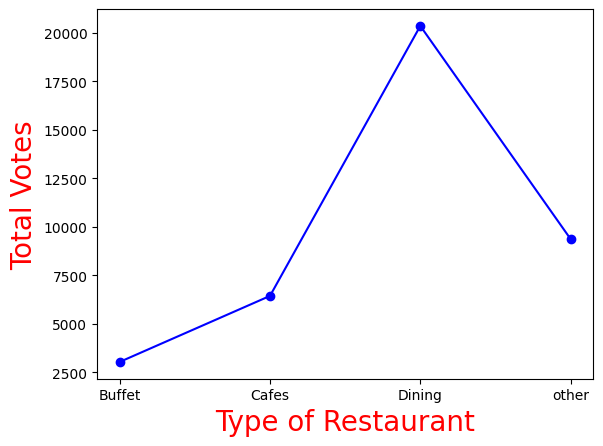

In [72]:
grouped_data = df.groupby("listed_in(type)")["votes"].sum()
result = pd.DataFrame({'vote':grouped_data})
plt.plot(result, c='blue', marker="o")
plt.xlabel("Type of Restaurant", c="red", size=20)
plt.ylabel("Total Votes", c="red", size=20)

**Conclusion**

Diningd restaurant have max votes compared to others

# **3. What are rating that the majority of restaurants have received ?**

In [73]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


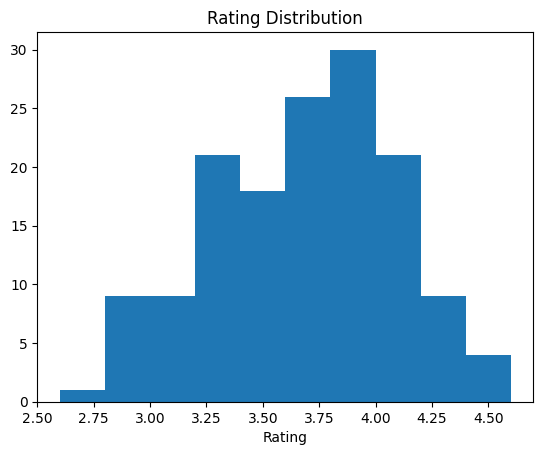

In [74]:
plt.hist(df['rate'],bins =10)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.show()

**Conclusion**

Majority rating received are between 3.5 - 4

# **4. Zomato has observed that most couples order most of their food online. What is their average spending on each other?**

In [75]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

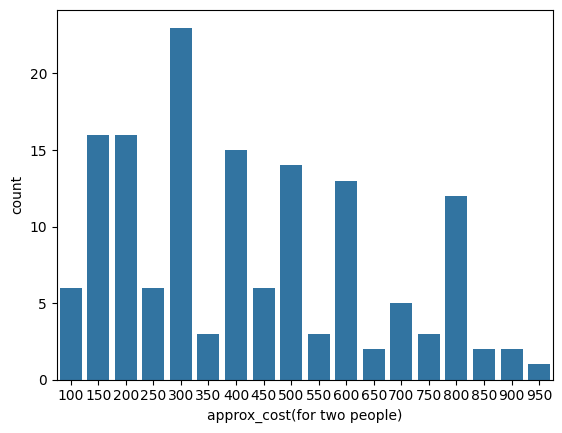

In [76]:
coupled_data = df['approx_cost(for two people)']
sns.countplot(x=coupled_data)


**Conclusion**

So majority customers prefer to order food from 300 - 500, out of which 300 being the most order value.

# **5. Which mode (Online / Offline) has received the maximum rating?**

In [77]:
df.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes


<Axes: xlabel='online_order', ylabel='rate'>

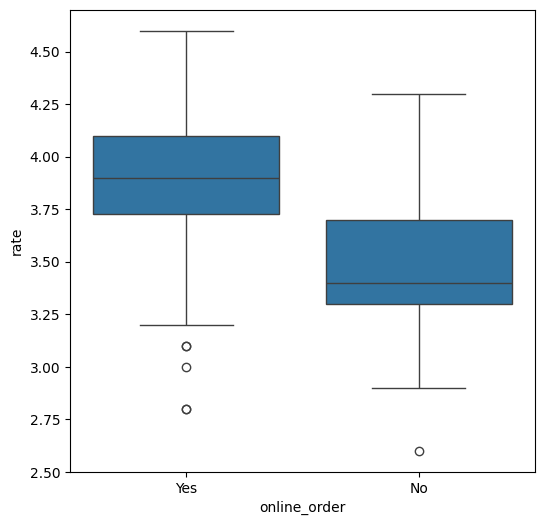

In [78]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order', y='rate', data=df)

**Conclusion**

Online order received more rating compared to offline ratings.

# **6. Which type of restaurant received more offline orders, so that Zomato can provide customers with some good offers?**

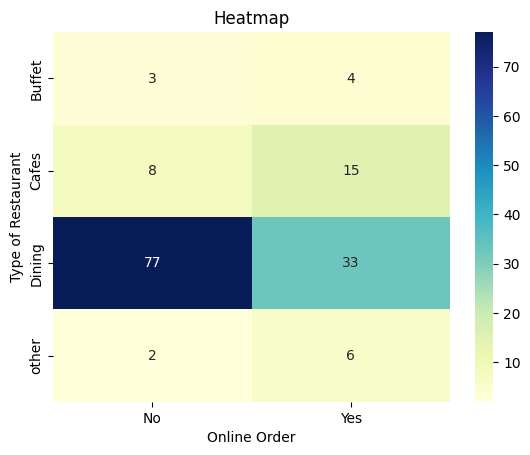

In [79]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order',aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Type of Restaurant')
plt.show()

**Conclusion**

Dining restaurants receive more offline orders/customers, whereas cafes receive more online orders than offline visits.